# Procesamiento de imágenes satelitales meteorológicas con Python 2022.
### Sergio Masuelli
## Practico 6.

Objetivos: 
  
  1. Análisis visual de imagen metorológica.
  
  2. Identificación básica de nubes.
  
  3. Bajada y Lectura de imágenes en formato original.

  4. Aplicar procesos básicos como calibración, recorte, realce, etc.
  
  5. Superposición de elementos geográficos: líneas de costa, meridianos, paralelos, etc.

## Parte A
### Procesamiento sobre imagenes meterológicas en formato png

Procesos:

1. Haga un script para levantar las imágenes *.png de GOES
2. Aplique a c/u un realce lineal al 2 % y Despliéguelas.
3. Observe y determine a qué regiones geográficas corresponden c/u (ayudese con Google Earth).
4. Observe c/u y decida qué elementos son más notables. Las nubes se ven claras u oscuras?
5. Seleccione aquellas bandas que correspondan a Sudamérica y acomode la tabla de visualización de modo que las nubes se vean blancas en todas ellas.
6. Identifique distintos tipos de nubes.
7. Realizar distintas combinaciones RGB para enfatizar:

  1. Distintos niveles de vapor de agua.
  2. Nieve y cirrus.
  3. Nubes convectivas, estratos, superficie (agua y tierra)
  4. Identifique distintos elementos de la superficie: lagos, rı́os, ciudades, salares, motañas (puede ayudarse con Google Earth para verificar sus hipótesis)


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg  
dir_img = 'C:/Users/marti/Desktop/Procesamiento Imagenes Satelitales 2022/guia6/' #modificar esta linea
os.chdir(dir_img)
from util_imag import *

### Haga un script para levantar las imágenes *.png de GOES


In [2]:
import glob
images = [mpimg.imread(file) for file in glob.glob("C:/Users/marti/Desktop/Procesamiento Imagenes Satelitales 2022/guia6/*.png")]

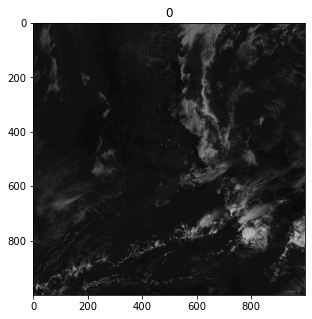

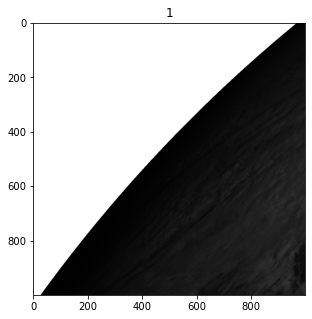

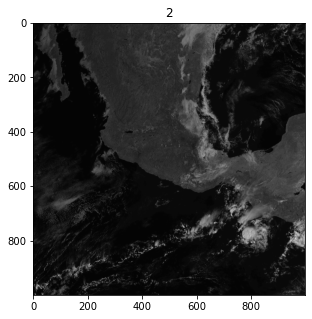

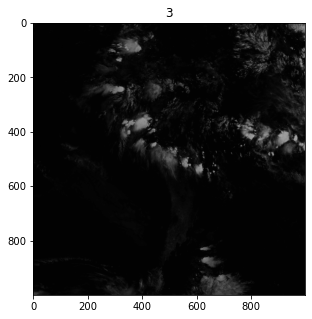

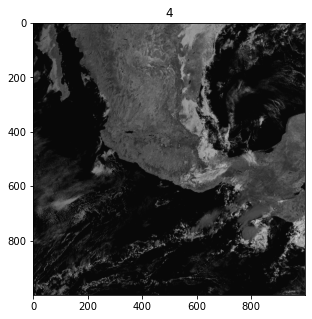

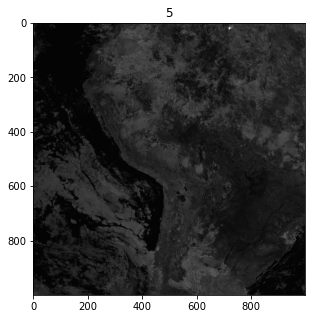

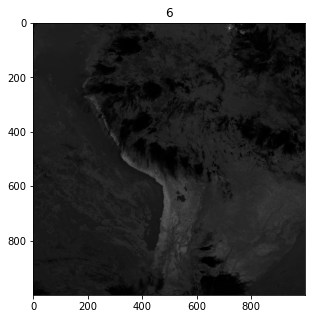

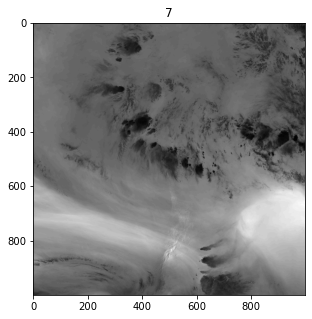

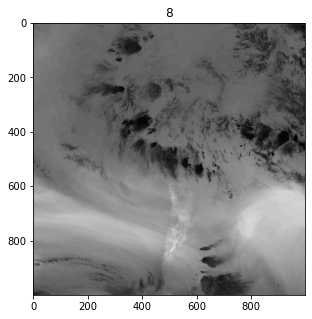

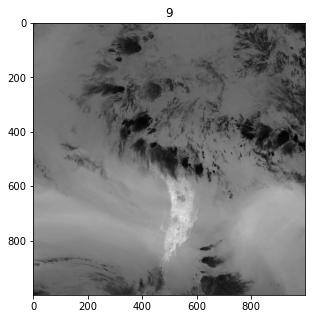

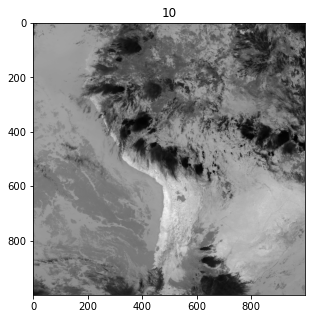

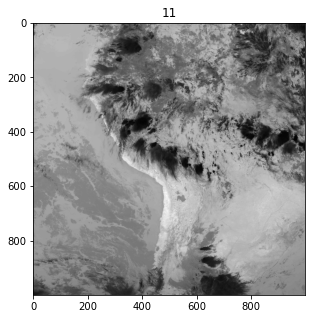

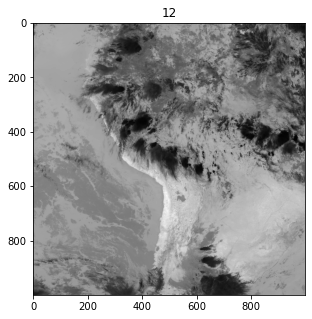

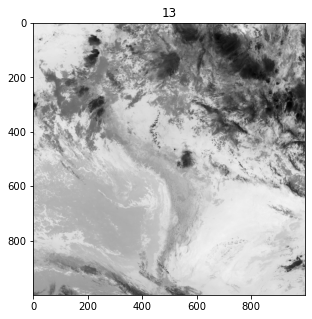

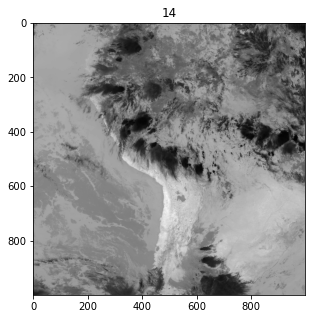

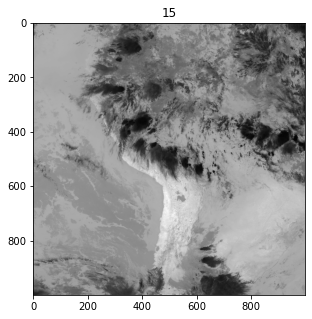

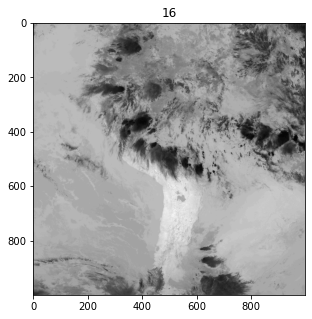

In [3]:
# Solo levanta 6 en adelante
# Levantamos imagenes
for i in range(0,len(images)):
    plt.figure(figsize=(10,5))
    plt.title(i)
    plt.imshow(images[i], 'gray') 
    plt.show()

### Aplique a c/u un realce lineal al 2 % y Despliéguelas.


In [5]:
def realce(vec, p):
    aux = np.sort(vec.flatten())
    imin = int(len(aux) * p / 100)
    imax = int(len(aux) * (100 - p) / 100)
    vmin = float(aux[imin])
    vmax = float(aux[imax])
    rimag = (vec - vmin) / (vmax - vmin)
    rimag[rimag < 0] = 0
    rimag[rimag > 1] = 1
    return rimag

In [6]:
images_realce = []
for i in range(len(images)):
    images_realce.append(realce(images[i], 2))

### Observe y determine a qué regiones geográficas corresponden c/u (ayudese con Google Earth).

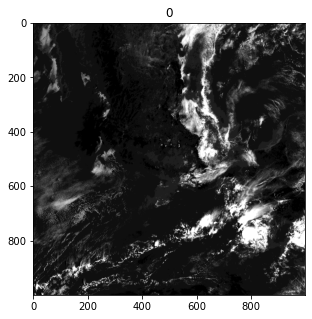

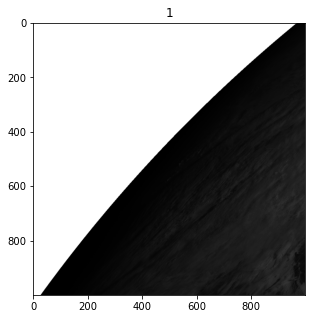

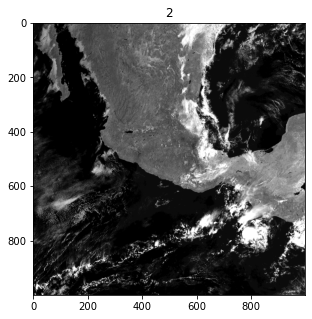

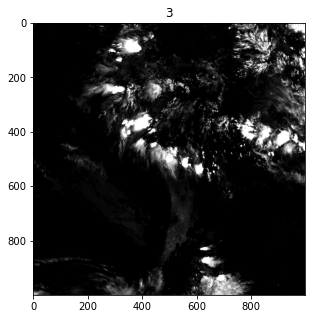

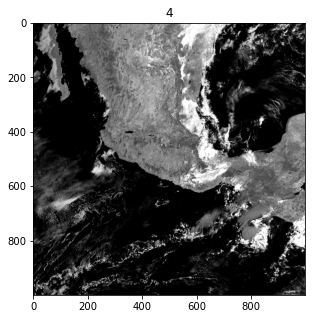

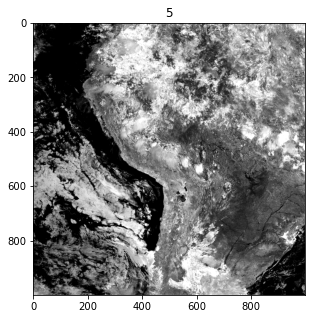

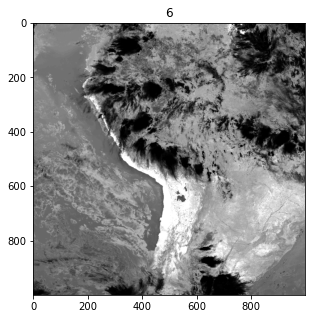

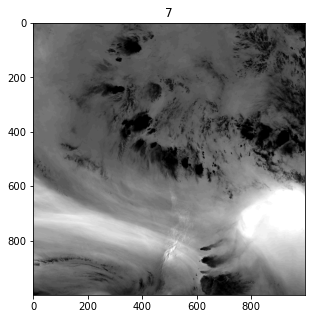

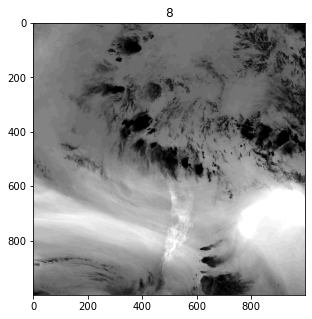

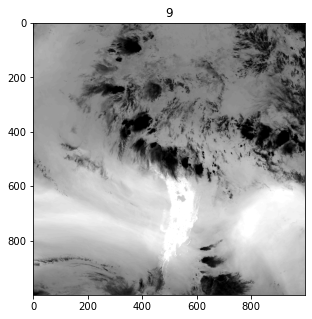

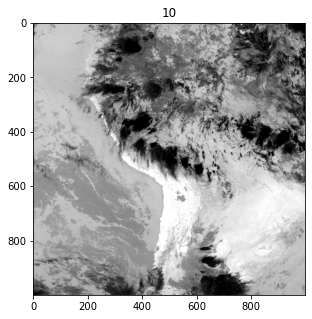

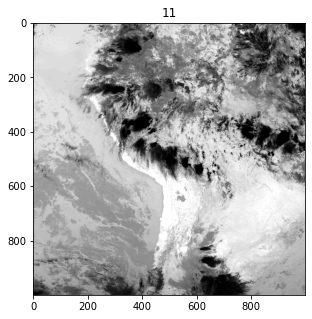

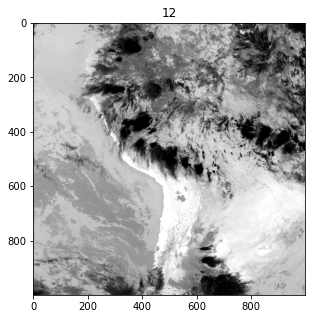

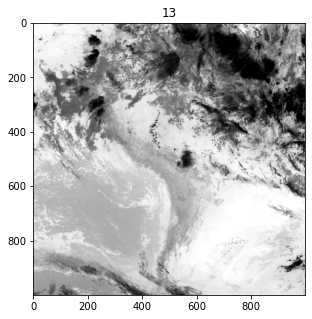

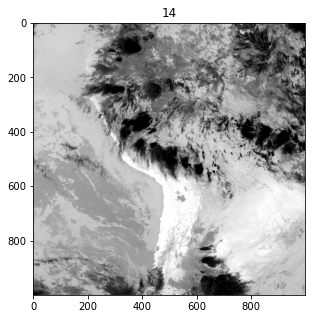

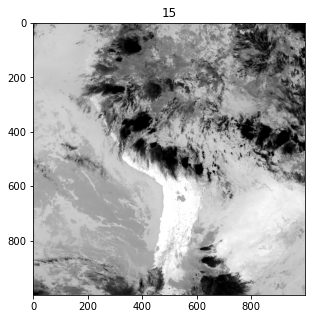

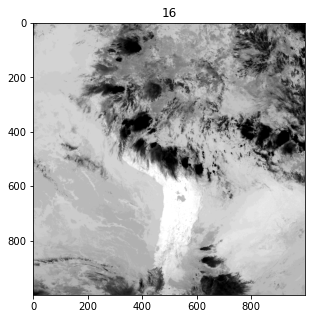

In [7]:
for i in range(0,len(images_realce)):
    plt.figure(figsize=(10,5))
    plt.title(i)
    plt.imshow(images_realce[i],'gray') 
    plt.show()

#### A que sitio geografico corresponden:
* 0: America central
* 1: Mitad espacio exterior mitad el mar Pacifico cercano a EEUU
* 2: America central
* 3: America del sur
* 4: America central
* 5: America del sur
* 6: America del sur
* 7: America del sur
* 8: America del sur
* 9: America del sur
* 10: America del sur
* 11: America del sur
* 12: America del sur
* 13: America del sur
* 14: America del sur
* 15: America del sur
* 16: America del sur

#### Observe c/u y decida qué elementos son más notables. Las nubes se ven claras u oscuras?
Los elementos mas notrables son las costas geograficas y las distintas superficies en la tierra.
Las nubes se ven claras.

#### Seleccione aquellas bandas que correspondan a Sudamérica y acomode la tabla de visualización de modo que las nubes se vean blancas en todas ellas.

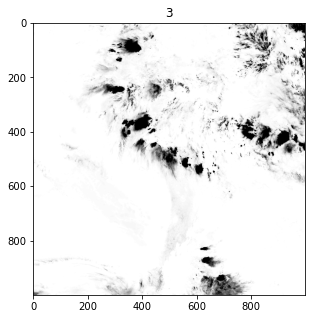

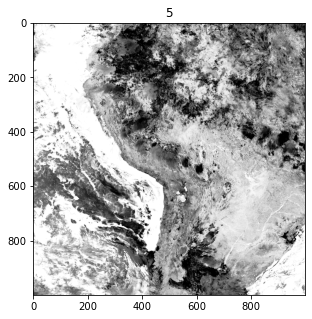

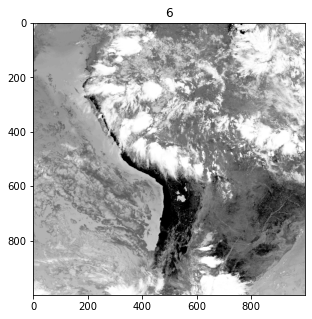

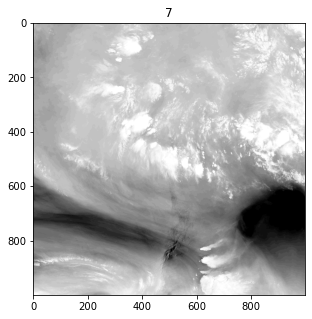

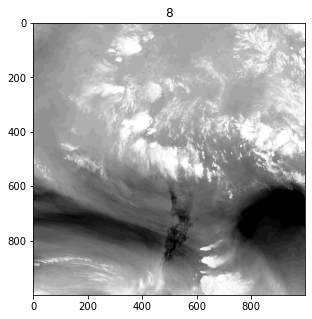

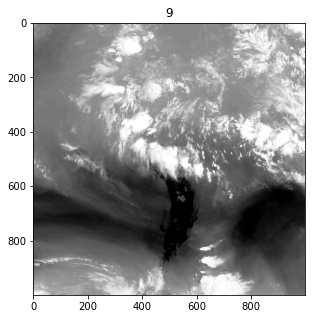

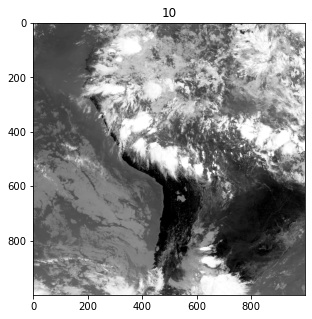

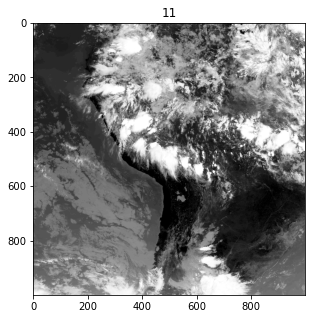

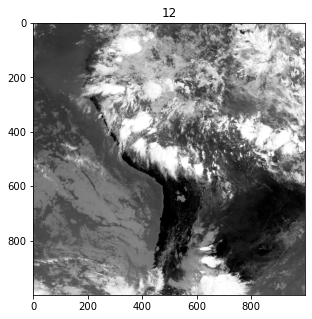

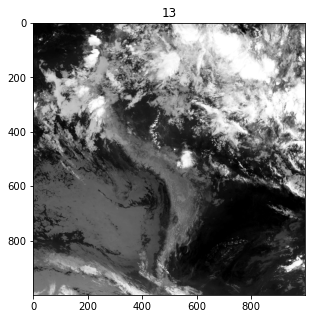

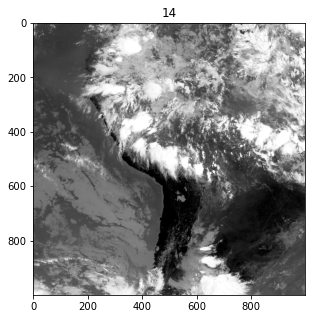

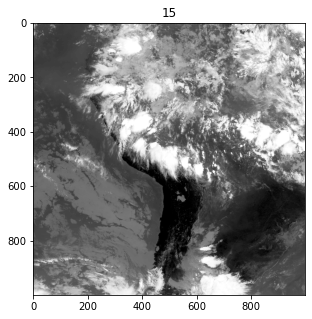

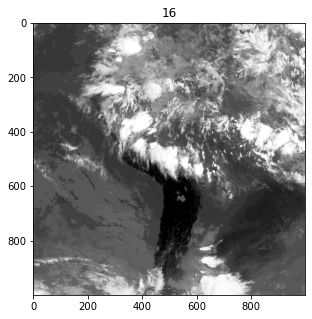

In [8]:
indices= [3,5,6,7,8,9,10,11,12,13,14,15,16]
# America del sur con nubes blancas
for i in indices:
    plt.figure(figsize=(10,5))
    plt.title(i)
    plt.imshow(images_realce[i], cmap= "Greys") 
    plt.show()

##### Identifique distintos tipos de nubes.
    Decir que vemos distintos tipos de nubes y donde estan.
    
    Vemos la costa bien marcada, lo que esta al lado de la costa es el agua entonces, por lo tanto la otra escala de gris habla de la nubes suponemos. 

    Ahora se ve mejor nubes altas bien brillantes blancas, las otras capas mas bajas.

###### Realizar distintas combinaciones RGB para enfatizar:
* Cada archivo es una banda diferente
* La 8,9,10 son de vapor de agua.
* 6 si, la 13 tmb que es la de temperatura de superficie y la 7.
* Usar las de resolucion co 2 km
Distintos niveles de vapor de agua.


Mostremos los 3 canales originales y la imagen color en subplots


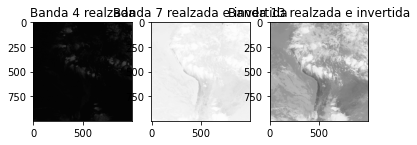

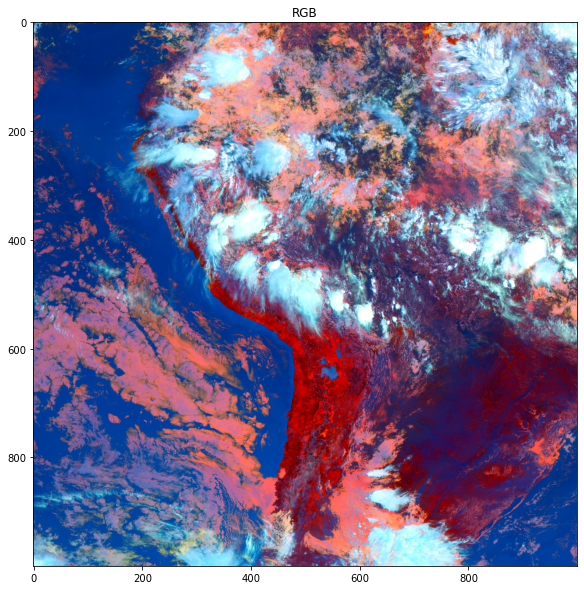

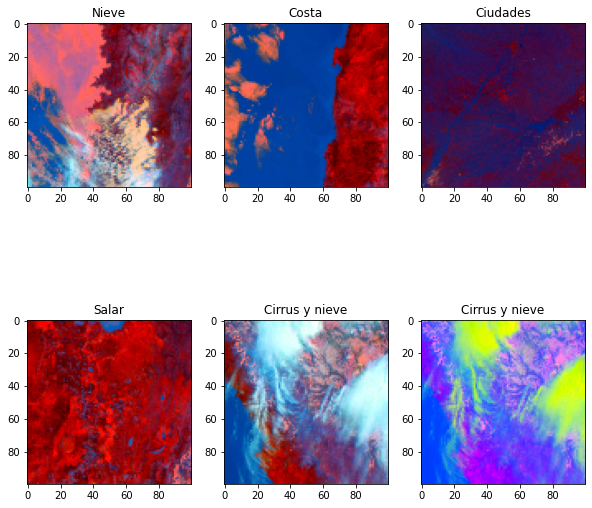

In [9]:
Inbox = dir_img


nombre=['OR_ABI-L1b-RadF-M3C01_G16_s20180961500406_e20180961511173_c20180961511217.png',
'OR_ABI-L1b-RadF-M3C02_G16_s20180961500406_e20180961511173_c20180961511211.png',
'OR_ABI-L1b-RadF-M3C03_G16_s20180961500406_e20180961511173_c20180961511220.png',
'OR_ABI-L1b-RadF-M3C04_G16_s20180961500406_e20180961511173_c20180961511197.png',
'OR_ABI-L1b-RadF-M3C05_G16_s20180961500406_e20180961511173_c20180961511218.png',
'OR_ABI-L1b-RadF-M3C06_G16_s20180961500406_e20180961511178_c20180961511215.png',
'OR_ABI-L1b-RadF-M3C07_G16_s20180961500406_e20180961511184_c20180961511220.png',
'OR_ABI-L1b-RadF-M3C08_G16_s20180961500406_e20180961511173_c20180961511220.png',
'OR_ABI-L1b-RadF-M3C09_G16_s20180961500406_e20180961511178_c20180961511238.png',
'OR_ABI-L1b-RadF-M3C10_G16_s20180961500406_e20180961511184_c20180961511233.png',
'OR_ABI-L1b-RadF-M3C11_G16_s20180961500406_e20180961511173_c20180961511232.png',
'OR_ABI-L1b-RadF-M3C12_G16_s20180961500406_e20180961511178_c20180961511229.png',
'OR_ABI-L1b-RadF-M3C13_G16_s20180961500406_e20180961511184_c20180961511236.png',
'OR_ABI-L1b-RadF-M3C14_G16_s20180951215403_e20180951226170_c20180951226236.png',
'OR_ABI-L1b-RadF-M3C14_G16_s20180961500406_e20180961511173_c20180961511238.png',
'OR_ABI-L1b-RadF-M3C15_G16_s20180961500406_e20180961511178_c20180961511237.png',
'OR_ABI-L1b-RadF-M3C16_G16_s20180961500406_e20180961511184_c20180961511235.png']

#%%
print ("\nMostremos los 3 canales originales y la imagen color en subplots")


#Lectura de una imagen desde archivo
imag2 = mpimg.imread(Inbox+nombre[1])
imag4 = mpimg.imread(Inbox+nombre[3])
imag6 = mpimg.imread(Inbox+nombre[5])
imag7 = mpimg.imread(Inbox+nombre[6])
imag13 = mpimg.imread(Inbox+nombre[12])


[filas,columnas] = imag4.shape[0:2]

RGB=np.zeros([filas,columnas,3])
RGB[:,:,0] = realce(imag6,2)
RGB[:,:,1] = realce(1 - imag13,2)
RGB[:,:,2] = realce(1 - imag7,2)


RGB2 = np.copy(RGB)
#RGB2[:,:,0] = realce_p(imag4)
RGB2[:,:,2] = realce(1 - imag4,2)


# Dibujamos la imagen original y sus 3 canales en subplots

plt.figure(num=1,figsize=(6,6)) #Establece el tamaño de la imagen en inches
plt.subplot(131) #Subdibujo en una matriz 2x2
plt.title('Banda 4 realzada')
plt.imshow(imag4,vmin=0,vmax=1,cmap='gray')

plt.subplot(132) #Subdibujo en una matriz 2x2
plt.title('Banda 7 realzada e invertida')
plt.imshow(imag7,vmin=0,vmax=1,cmap='Greys')

plt.subplot(133) #Subdibujo en una matriz 2x2
plt.title('Banda 13 realzada e invertida')
plt.imshow(imag13,vmin=0,vmax=1,cmap='Greys')

plt.show()

plt.figure(figsize=[10, 10])
plt.title('RGB')
plt.imshow(RGB)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(231)
plt.imshow(RGB[850:950, 400:500, :])
plt.title('Nieve')

plt.subplot(232)
plt.imshow(RGB[700:800, 400:500, :])
plt.title('Costa')

plt.subplot(233)
plt.imshow(RGB[750:850, 720:820, :])
plt.title('Ciudades')

plt.subplot(234)
plt.imshow(RGB[650:750, 500:600, :])
plt.title('Salar')

plt.subplot(235)
plt.imshow(RGB[400:500, 300:400, :])
plt.title('Cirrus y nieve')

plt.subplot(236)
plt.imshow(RGB2[400:500, 300:400, :])
plt.title('Cirrus y nieve')


plt.show()

## Parte B
### Procesamiento de imágenes en formato original.

Procesos:

1. Pasar el script Prac6b.py al colab separando las celdas convenientemente para poder estudiar las distintas partes.

2. Ejecutar cada celda y comentar qué hace c/u.

3. Agregue celdas que permitan identificar distintas coberturas de interés del punto 7 de la parte A.



Nota: las imágenes se encuentran en: https://drive.google.com/drive/folders/1vFWRvrvUBDJtN0wlHozHk4vBFydS6FT3?usp=sharing

#### Comentar que hace cada celda:
Define el directorio de trabajo, importa las librerias necesarias e importa la imagen.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs  # Plot maps
import os        
from util_imag import *

dir_img = 'C:/Users/marti/Desktop/Procesamiento Imagenes Satelitales 2022/guia6/GOES/' #modificar esta linea
os.chdir(dir_img)

img_name=['OR_ABI-L1b-RadF-M3C13_G16_s20180961500406_e20180961511184_c20180961511236.nc']
# img_name=['OR_ABI-L1b-RadF-M3C01_G16_s20180961500406_e20180961511173_c20180961511217.nc']

print ('Importando la imagen: %s' %img_name[0])

imagenobj = Dataset(dir_img+img_name[0])

print ('Importando las variables de la imagen: %s' %img_name[0])

metadato = imagenobj.variables

Importando la imagen: OR_ABI-L1b-RadF-M3C13_G16_s20180961500406_e20180961511184_c20180961511236.nc
Importando las variables de la imagen: OR_ABI-L1b-RadF-M3C13_G16_s20180961500406_e20180961511184_c20180961511236.nc


#### Comentar que hace cada celda:
Define parametros necesarios para realizar la proyeccion. Al incio la imagen es una matriz cuadrada pero luego de este paso se definen los parametros para georeferenciarla. 

In [18]:
altura=metadato['goes_imager_projection'].perspective_point_height
semieje_may=metadato['goes_imager_projection'].semi_major_axis
semieje_men=metadato['goes_imager_projection'].semi_minor_axis
lon_cen=metadato['goes_imager_projection'].longitude_of_projection_origin

#img_extent = (-5500000, 5500000, -5500000, 5500000) #dimensiones de la escena en km
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
pol=semieje_may*altura/(semieje_may+altura)
ecu=semieje_men*altura/(semieje_may+altura)

icanal = int(metadato['band_id'][:])
print ('Canal %d' %icanal)

imagen = metadato['Rad'][:].data

Canal 13


#### Comentar que hace cada celda:
Calibracion de la imagen, para los canales mayores o iguales que 7 se calcula la temperatura de brillo, mientras que para los demas canales se deja en unidades de radiancia a traves de un ajuste lineal. Esta calibracion es meramente necesaria si realizamos algun tipo de algoritmo con la imagen. 

In [19]:
print ('Calibrando la imagen')
if icanal >=7:
    #Parámetros de calibracion
    fk1 = metadato['planck_fk1'][0] # DN -> K
    fk2 = metadato['planck_fk2'][0]
    bc1 = metadato['planck_bc1'][0]
    bc2 = metadato['planck_bc2'][0]

    imag_cal = (fk2 / (np.log((fk1 / imagen) + 1)) - bc1 ) / bc2-273.15 # K -> C
    Unit = "Temperatura de Brillo [°C]"
else:
    pendiente= metadato['Rad'].scale_factor
    ordenada= metadato['Rad'].add_offset    
    imag_cal =imagen*pendiente+ordenada
    Unit = "Radiancia ["+metadato['Rad'].units+"]"

Calibrando la imagen


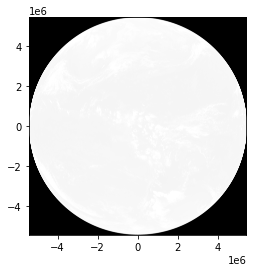

In [13]:
imagen3=realce(imag_cal, 2)
plt.figure()
plt.imshow(imagen3,extent=img_extent,cmap='Greys')

#### Comentar que hace cada celda:
Terminamos de ajustar la georeferenciacion de la imagen con los parametros previamente definidos. Realizamos una proyeccion geoestacionaria, ademas cargamos las lineas imaginarias y las costas. Luego graficamos la imagen resultante. 

Graficando


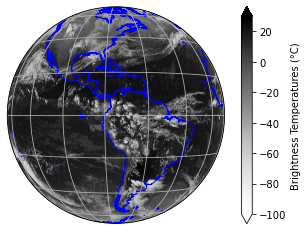

In [14]:
print("Graficando")

plt.figure()

crs=ccrs.Geostationary(central_longitude=lon_cen, satellite_height=altura)#proyeccion geoestacionaria para Goes16
ax = plt.axes(projection=crs)
ax.gridlines() #agrega linea de meridianos y paralelos 
ax.coastlines(resolution='10m',color='blue') #agrega líneas de costa

# img=plt.imshow(imag_cal,extent=img_extent,vmin=imag_cal.min(),vmax=imag_cal.max(),cmap='Greys')
img = plt.imshow(imag_cal,extent=img_extent,vmin=-100.,vmax=30.,cmap='Greys')

# Add a colorbar
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)
 
plt.show()

### Comentar que hace cada celda:
Generamos un recorte de interes.

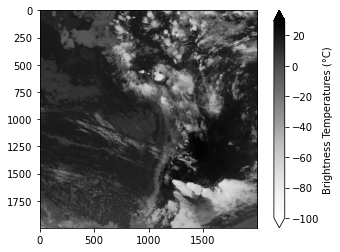

In [15]:
#%% Recortes crudos
psize=2000 # lado de pixel de referencia en m
N=5424 #numero de pixeles de referencia

Nx=2000 #numero de puntos del recorte en x
Ny=2000 #numero de puntos del recorte en x

esc=int(imag_cal.shape[0]/N)

x0 = -1700000 # Coordenada x del limite superior izquierdo en m
y0 = -100000 # Coordenada y del limite superior izquierdo en m

f0=int((img_extent[1]-y0)/psize*esc) #fila del angulo superior izquierdo
c0=int((img_extent[3]+x0)/psize*esc) #columna del angulo superior izquierdo
f1=int(f0+Nx*esc) #fila del angulo inferior derecho
c1=int(c0+Ny*esc) #columna del angulo inferior derecho

img_extentr=[x0,x0+Nx*psize*esc,y0-Ny*psize*esc,y0]

indf=range(f0,f1,esc)
indc=range(c0,c1,esc)
# im_rec=imag_cal[:].data[indf,indc]
im_rec=imag_cal[indf[0]:indf[-1],indc[0]:indc[-1]]

plt.figure()
img=plt.imshow(im_rec,vmin=-100.,vmax=30.,cmap='Greys')
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

#### Comentar que hace cada celda:
Hacemos la grafica del recorte de interes en el mapa con la proyeccion previamente definida. 

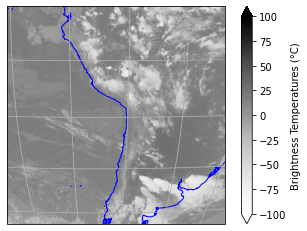

In [16]:
# im_rec=imagedata[f0:f1:esc,c0:c1:esc]
plt.figure()
ax = plt.axes(projection=crs)
ax.gridlines() #agrega linea de meridianos y paralelos 
ax.coastlines(resolution='10m',color='blue') #agrega líneas de costa

img=plt.imshow(im_rec,transform=crs, extent=img_extentr,vmin=-100.,vmax=100.,cmap='Greys')
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

plt.show()

#### Comentar que hace cada celda:
Superpone recorte e imagen previa.

## Parte C
### Generación de un producto de nivel L1+

Procesos:

1. Elija y baje las bandas necesarias para componer un producto de Microfísica Nocturna. (https://www.star.nesdis.noaa.gov/goes/documents/QuickGuide_GOESR_NtMicroRGB_final.pdf)

2. Genere un script para generar este producto. 

3. Identifique visualmente distintos tipos de nube ayudándose con la guia dada por NESDIS.



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs  # Plot maps
import os        
from util_imag import *
import numpy as np   

def realce(vec, p):
    aux = np.sort(vec.flatten())
    imin = int(len(aux) * p / 100)
    imax = int(len(aux) * (100 - p) / 100)
    vmin = float(aux[imin])
    vmax = float(aux[imax])
    rimag = (vec - vmin) / (vmax - vmin)
    rimag[rimag < 0] = 0
    rimag[rimag > 1] = 1
    return rimag

In [21]:
dir_img = 'C:/Users/marti/Desktop/Procesamiento Imagenes Satelitales 2022/guia6/NuevasImag/' #modificar esta linea

# File to read
image1 = "OR_ABI-L1b-RadF-M3C15_G16_s20183480030353_e20183480041126_c20183480041185.nc"
# Read the file using the NetCDF library
file1 = Dataset(dir_img+image1)
metadato1 = file1.variables

In [22]:
altura=metadato1['goes_imager_projection'].perspective_point_height
semieje_may=metadato1['goes_imager_projection'].semi_major_axis
semieje_men=metadato1['goes_imager_projection'].semi_minor_axis
lon_cen=metadato1['goes_imager_projection'].longitude_of_projection_origin

#img_extent = (-5500000, 5500000, -5500000, 5500000) #dimensiones de la escena en km
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
pol=semieje_may*altura/(semieje_may+altura)
ecu=semieje_men*altura/(semieje_may+altura)

icanal = int(metadato1['band_id'][:])
print ('Canal %d' %icanal)

imagen1 = metadato1['Rad'][:].data

Canal 15


In [23]:
print ('Calibrando la imagen')
if icanal >7:
    #Parámetros de calibracion
    fk1 = metadato1['planck_fk1'][0] # DN -> K
    fk2 = metadato1['planck_fk2'][0]
    bc1 = metadato1['planck_bc1'][0]
    bc2 = metadato1['planck_bc2'][0]

    imag_cal1 = (fk2 / (np.log((fk1 / imagen1) + 1)) - bc1 ) / bc2-273.15 # K -> C
    Unit = "Temperatura de Brillo [°C]"
else:
    pendiente= metadato1['Rad'].scale_factor
    ordenada= metadato1['Rad'].add_offset    
    imag_cal1 =imagen1*pendiente+ordenada
    Unit = "Radiancia ["+metadato1['Rad'].units+"]"

Calibrando la imagen


Graficando


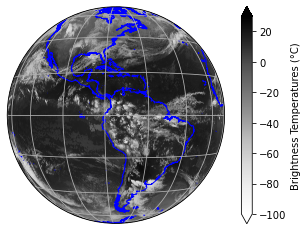

In [24]:
print("Graficando")

plt.figure()

crs=ccrs.Geostationary(central_longitude=lon_cen, satellite_height=altura)#proyeccion geoestacionaria para Goes16
ax = plt.axes(projection=crs)
ax.gridlines() #agrega linea de meridianos y paralelos 
ax.coastlines(resolution='10m',color='blue') #agrega líneas de costa

img1=plt.imshow(imag_cal1,extent=img_extent,vmin=-100.,vmax=30.,cmap='Greys')

# Add a colorbar
plt.colorbar(img1, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)
 
plt.show()

In [26]:
# File to read
image2 = "OR_ABI-L1b-RadF-M3C13_G16_s20183480030353_e20183480041132_c20183480041186.nc"
# Read the file using the NetCDF library
file2 = Dataset(dir_img+image2)
metadato2 = file2.variables

In [27]:
altura=metadato2['goes_imager_projection'].perspective_point_height
semieje_may=metadato2['goes_imager_projection'].semi_major_axis
semieje_men=metadato2['goes_imager_projection'].semi_minor_axis
lon_cen=metadato2['goes_imager_projection'].longitude_of_projection_origin

#img_extent = (-5500000, 5500000, -5500000, 5500000) #dimensiones de la escena en km
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
pol=semieje_may*altura/(semieje_may+altura)
ecu=semieje_men*altura/(semieje_may+altura)

icanal = int(metadato2['band_id'][:])
print ('Canal %d' %icanal)

imagen2 = metadato2['Rad'][:].data

Canal 13


In [28]:
print ('Calibrando la imagen')
if icanal >7:
    #Parámetros de calibracion
    fk1 = metadato2['planck_fk1'][0] # DN -> K
    fk2 = metadato2['planck_fk2'][0]
    bc1 = metadato2['planck_bc1'][0]
    bc2 = metadato2['planck_bc2'][0]

    imag_cal2 = (fk2 / (np.log((fk1 / imagen2) + 1)) - bc1 ) / bc2-273.15 # K -> C
    Unit = "Temperatura de Brillo [°C]"
else:
    pendiente= metadato2['Rad'].scale_factor
    ordenada= metadato2['Rad'].add_offset    
    imag_cal2 =imagen2*pendiente+ordenada
    Unit = "Radiancia ["+metadato2['Rad'].units+"]"

Calibrando la imagen


Graficando


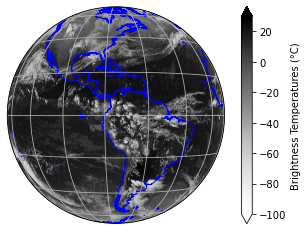

In [29]:
print("Graficando")

plt.figure()

crs=ccrs.Geostationary(central_longitude=lon_cen, satellite_height=altura)#proyeccion geoestacionaria para Goes16
ax = plt.axes(projection=crs)
ax.gridlines() #agrega linea de meridianos y paralelos 
ax.coastlines(resolution='10m',color='blue') #agrega líneas de costa

img2=plt.imshow(imag_cal2,extent=img_extent,vmin=-100.,vmax=30.,cmap='Greys')

# Add a colorbar
plt.colorbar(img2, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)
 
plt.show()

In [30]:
# File to read
image3 = "OR_ABI-L1b-RadF-M3C07_G16_s20183480030353_e20183480041132_c20183480041170.nc"
# Read the file using the NetCDF library
file3 = Dataset(dir_img+image3)
metadato3 = file3.variables

In [31]:
altura=metadato3['goes_imager_projection'].perspective_point_height
semieje_may=metadato3['goes_imager_projection'].semi_major_axis
semieje_men=metadato3['goes_imager_projection'].semi_minor_axis
lon_cen=metadato3['goes_imager_projection'].longitude_of_projection_origin

#img_extent = (-5500000, 5500000, -5500000, 5500000) #dimensiones de la escena en km
img_extent = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)
pol=semieje_may*altura/(semieje_may+altura)
ecu=semieje_men*altura/(semieje_may+altura)

icanal = int(metadato3['band_id'][:])
print ('Canal %d' %icanal)

imagen3 = metadato3['Rad'][:].data

Canal 7


In [32]:
print ('Calibrando la imagen')
if icanal >=7:
    #Parámetros de calibracion
    fk1 = metadato3['planck_fk1'][0] # DN -> K
    fk2 = metadato3['planck_fk2'][0]
    bc1 = metadato3['planck_bc1'][0]
    bc2 = metadato3['planck_bc2'][0]

    imag_cal3 = (fk2 / (np.log((fk1 / imagen3) + 1)) - bc1 ) / bc2-273.15 # K -> C
    Unit = "Temperatura de Brillo [°C]"
else:
    pendiente= metadato3['Rad'].scale_factor
    ordenada= metadato3['Rad'].add_offset    
    imag_cal3 =imagen3*pendiente+ordenada
    Unit = "Radiancia ["+metadato3['Rad'].units+"]"

Calibrando la imagen


C:\Users\marti\AppData\Local\Temp\ipykernel_14080\3312759259.py:9: RuntimeWarning: invalid value encountered in log
  imag_cal3 = (fk2 / (np.log((fk1 / imagen3) + 1)) - bc1 ) / bc2-273.15 # K -> C


Graficando


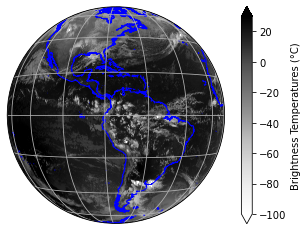

In [33]:
print("Graficando")

plt.figure()

crs=ccrs.Geostationary(central_longitude=lon_cen, satellite_height=altura)#proyeccion geoestacionaria para Goes16
ax = plt.axes(projection=crs)
ax.gridlines() #agrega linea de meridianos y paralelos 
ax.coastlines(resolution='10m',color='blue') #agrega líneas de costa

img3=plt.imshow(imag_cal3,extent=img_extent,vmin=-100.,vmax=30.,cmap='Greys')

# Add a colorbar
plt.colorbar(img3, label='Brightness Temperatures (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)
 
plt.show()

In [34]:
def realce_lineal_trozos2(vo, vt, v):
    '''
      Realiza un ajuste lineal a trozos para un array 2D
      Transforma mediante ajuste lineales el valor de entrada a una salida entre 0 y 1
      Inputs:
      v0 : valores que definen los umbrales de corte
           tienen que ser valores ordenados Reales
      vt : valores a los que se transforman los valores de corte,
           tienen que estar en el intervalo [0,1]
      v : array 2 D de entrada   
      Ouput:
      vv : array 2 D transformado
      '''
    vv=np.copy(v)
    for j in range(len(vo)-1):
        i=np.argwhere((vo[j] <= v)  & (v <= vo[j+1]))
        if np.size(i) >0:
            vv[i[:,0],i[:,1]]=(vt[j+1]-vt[j])/(vo[j+1]-vo[j])*(v[i[:,0],i[:,1]]-vo[j])+vt[j]
    vv[vv<0] = 0.
    vv[vv>1] = 1.
    return vv  

In [35]:
[filas,columnas] = imag_cal1.shape[0:2]

# 15,13,7
# 12.4,10.4,3.9
# Hacerle el realce.
dif=np.zeros([filas,columnas,3])
dif[:,:,0]=(imag_cal1-imag_cal2)
dif[:,:,1] = (imag_cal2-imag_cal3)
dif[:,:,2] = (imag_cal2)

In [36]:
RGB=np.zeros([filas,columnas,3])
RGB[:,:,0] = realce_lineal_trozos2([-6.7],[2.6],dif[:,:,0])
RGB[:,:,1] = realce_lineal_trozos2([-3.1],[5.2],dif[:,:,1])
RGB[:,:,2] = realce_lineal_trozos2([-29.6],[19.5],dif[:,:,2])

In [37]:
RGB[:,:,0].min(),RGB[:,:,0].max(),RGB[:,:,1].min(),RGB[:,:,1].max(),RGB[:,:,2].min(),RGB[:,:,2].max()

(0.0, 1.0, 0.0, 1.0, 0.0, 1.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


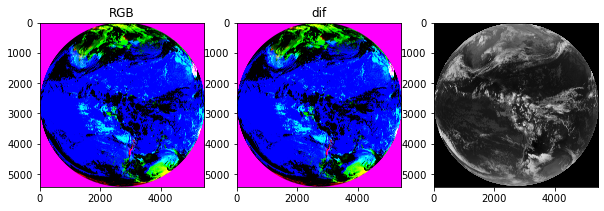

In [38]:
plt.figure(figsize=[10, 10])
plt.subplot(1,3,1)
plt.title('RGB')
plt.imshow(RGB)

plt.subplot(1,3,2)
plt.title('dif')
plt.imshow(dif,vmin=0.,vmax=255.)

plt.subplot(1,3,3)
plt.imshow(imag_cal2,vmin=-100.,vmax=30.,cmap='Greys')

plt.show()

Como vimos en la clase de consulta se puede notar que existe algun tipo de error en el resultado, pero procedere a interpretarlo para darle un cierre a la guia. 

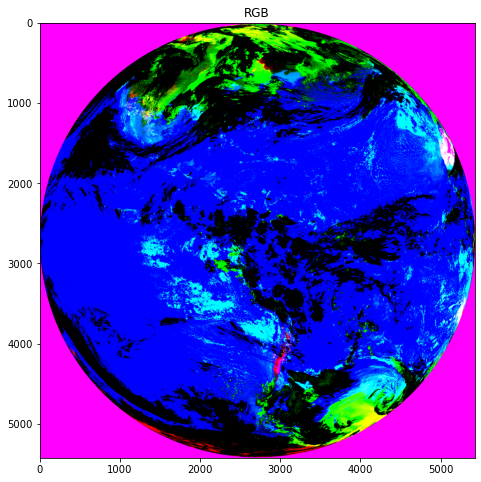

In [39]:
plt.figure(figsize=[12, 8])
plt.title('RGB')
plt.imshow(RGB)

A partir de la imagen resultante podriamos suponer que las distintas partes de la imagen hacen referencia a:
* Color negro: High, thin cloud.
* Color azul: High, thin, ice cloud (dark blue).
* Color celeste: Very low, warm cloud (aqua).
* Color verde: Low, cool, cloud (bright green).
* Color rosa dentro de lo azul: High, very thin, ice cloud (purple).